In [136]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import DecisionTreeRegressor

# Data Exploration

In [138]:
data=pd.read_csv("House.csv")
print(data)

                  date         price  bedrooms  bathrooms  sqft_living  \
0     02-05-2014 00:00  3.130000e+05         3       1.50         1340   
1     02-05-2014 00:00  2.384000e+06         5       2.50         3650   
2     02-05-2014 00:00  3.420000e+05         3       2.00         1930   
3     02-05-2014 00:00  4.200000e+05         3       2.25         2000   
4     02-05-2014 00:00  5.500000e+05         4       2.50         1940   
...                ...           ...       ...        ...          ...   
4595  09-07-2014 00:00  3.081667e+05         3       1.75         1510   
4596  09-07-2014 00:00  5.343333e+05         3       2.50         1460   
4597  09-07-2014 00:00  4.169042e+05         3       2.50         3010   
4598  10-07-2014 00:00  2.034000e+05         4       2.00         2090   
4599  10-07-2014 00:00  2.206000e+05         3       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0    

In [139]:
data.shape

(4600, 18)

In [140]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [141]:
data.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [143]:
#To check the statistics of data
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [144]:
# Checking for Null Values
nullvalues = data.isna().sum()
print('Total null values in the dataset :', nullvalues)

Total null values in the dataset : date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [145]:
data.shape

(4600, 18)

In [146]:
# Checking for duplicates
duplicates = data.duplicated()
duplicates = duplicates.unique()

if len(duplicates) == 1:
    print('There are no Duplicates in this Dataset')
else: 
    print('There are Duplicates in the Dataset')

There are no Duplicates in this Dataset


In [147]:
#Removing outliers where price is greater than 10M
data = data[data['price'] <= 10000000]
data = data[data['sqft_lot'] <= 50000]

In [148]:
data.drop(columns=["country", "statezip","street","date","city"], inplace=True)

# Data visualization

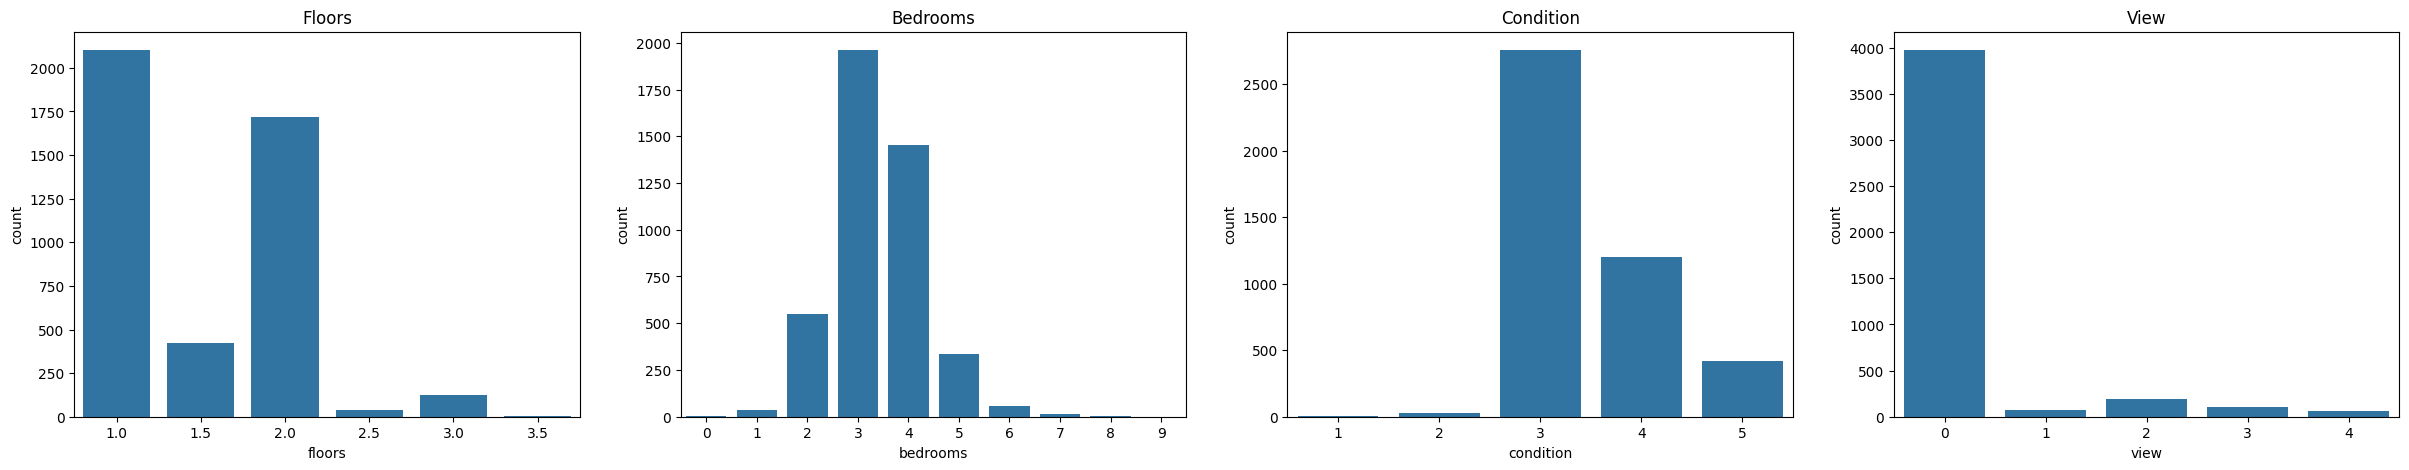

In [149]:
# Create a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30,5))

# First count plot
sns.countplot(x='floors', data=data, ax=axes[0])  # Replace 'column1'
axes[0].set_title('Floors')

# Second count plot
sns.countplot(x='bedrooms', data=data, ax=axes[1])  # Replace 'column2'
axes[1].set_title('Bedrooms')

# Third count plot 
sns.countplot(x='condition', data=data, ax=axes[2])
axes[2].set_title('Condition')

#Fourth count plot 
sns.countplot(x='view', data=data, ax=axes[3])
axes[3].set_title('View')

# Display the plot
plt.show()


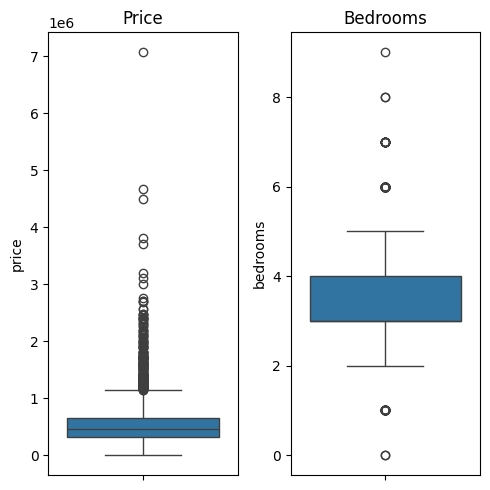

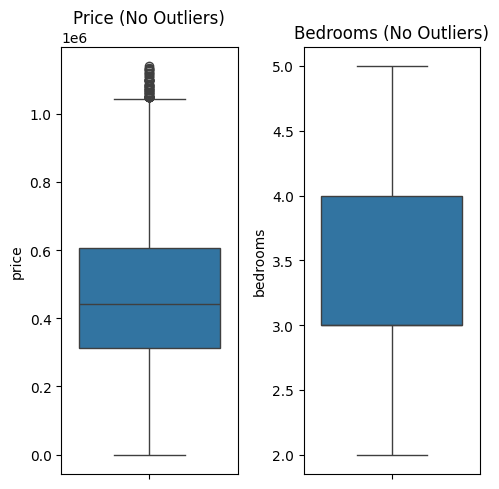

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame

# Visualizing boxplots for 'price' and 'bedrooms'
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data['price'])
plt.title('Price')
plt.subplot(1, 2, 2)
sns.boxplot(data['bedrooms'])
plt.title('Bedrooms')
plt.tight_layout()
plt.show()

# Calculate IQR and bounds for 'price'
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Calculate IQR and bounds for 'bedrooms'
Q1_bedrooms = data['bedrooms'].quantile(0.25)
Q3_bedrooms = data['bedrooms'].quantile(0.75)
IQR_bedrooms = Q3_bedrooms - Q1_bedrooms
lower_bound_bedrooms = Q1_bedrooms - 1.5 * IQR_bedrooms
upper_bound_bedrooms = Q3_bedrooms + 1.5 * IQR_bedrooms

# Filter out outliers
data_no_outliers1 = data[
    (data['price'] >= lower_bound_price) & (data['price'] <= upper_bound_price) &
    (data['bedrooms'] >= lower_bound_bedrooms) & (data['bedrooms'] <= upper_bound_bedrooms)
]

# Visualizing boxplots again after outlier removal
plt.figure(figsize=(5, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data_no_outliers1['price'])
plt.title('Price (No Outliers)')
plt.subplot(1, 2, 2)
sns.boxplot(data_no_outliers1['bedrooms'])
plt.title('Bedrooms (No Outliers)')
plt.tight_layout()
plt.show()

# If you want to overwrite the original 'data' DataFrame with the one without outliers:
# data = data_no_outliers.copy()


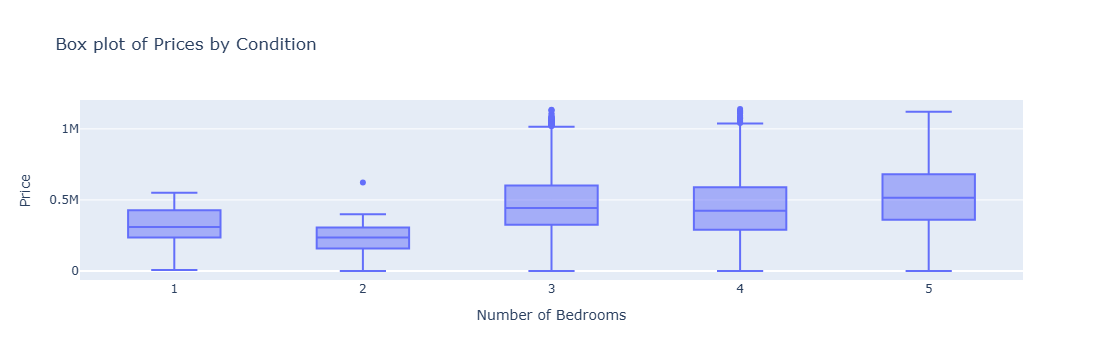

In [151]:
fig = px.box(data_no_outliers1, x='condition', y='price', title='Box plot of Prices by Condition')
fig.update_layout(xaxis_title='Number of Bedrooms', yaxis_title='Price')
fig.show()

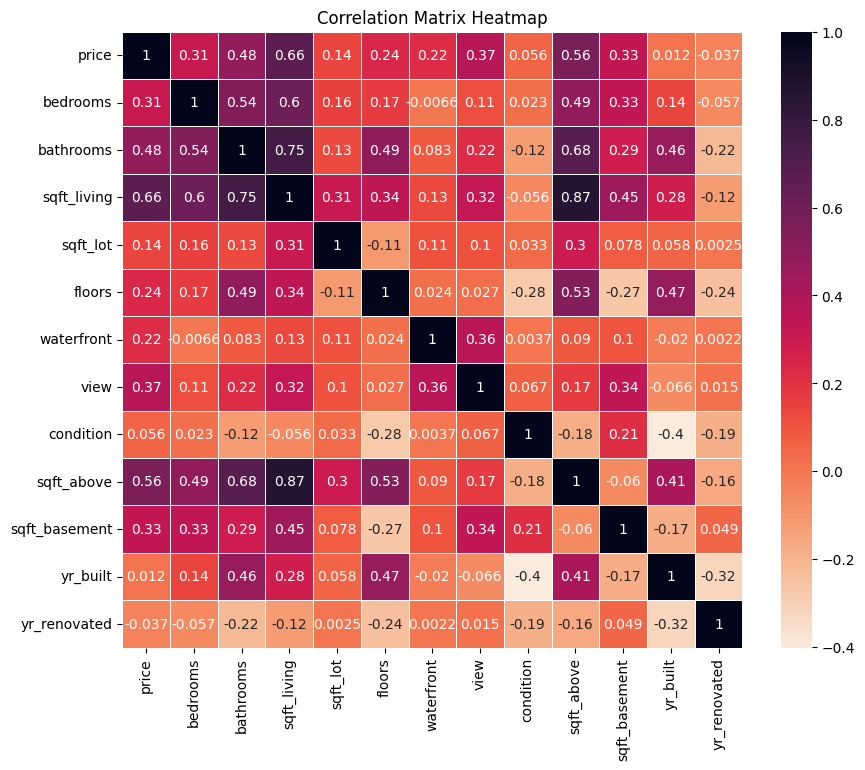

In [152]:
#numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()
#print(numerical_columns)

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket_r', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

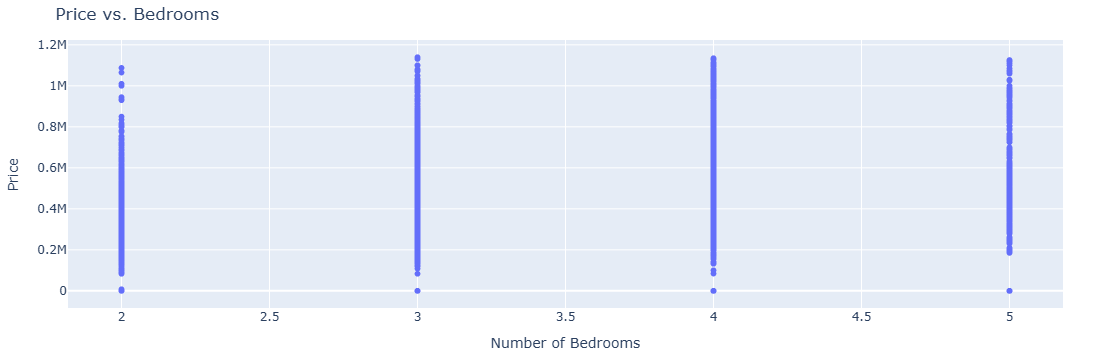

In [153]:
# Assuming 'data' is your DataFrame and it contains 'price' and 'bedrooms' columns
fig = px.scatter(data_no_outliers1, x='bedrooms', y='price', title='Price vs. Bedrooms',
                 labels={'bedrooms': 'Number of Bedrooms', 'price': 'Price'})

fig.update_layout(
    xaxis=dict(title='Number of Bedrooms'),
    yaxis=dict(title='Price'),
    margin=dict(l=40, r=40, b=40, t=40)
)

# Display the scatterplot
fig.show()

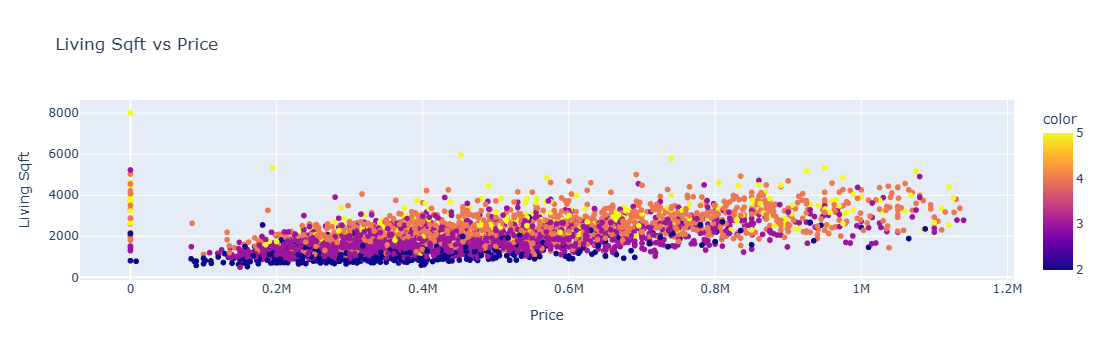

In [154]:
data_sqft = data_no_outliers1[data_no_outliers1['price']<5000000]
fig = px.scatter(x = data_sqft['price'], y= data_sqft['sqft_living'], title='Living Sqft vs Price', color= data_sqft['bedrooms'])

fig.update_layout(
    xaxis=dict(title='Price'),
    yaxis=dict(title='Living Sqft'),
    #margin=dict(l=40, r=40, b=40, t=40)
)

# Display the scatterplot
fig.show()

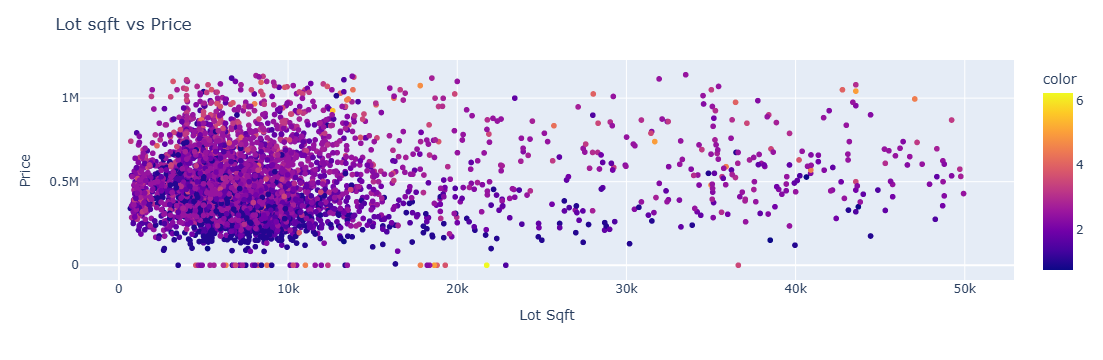

In [155]:
data_sqft = data_no_outliers1[data_no_outliers1['price']<5000000]
fig = px.scatter(x=data_sqft['sqft_lot'], y=data_sqft['price'], color=data_sqft['bathrooms'])
fig.update_layout(
    xaxis= dict(title='Lot Sqft'),
    yaxis= dict(title='Price'),
    #color=dict(title='Bathrooms'),
    title= 'Lot sqft vs Price'
) 

fig.show()

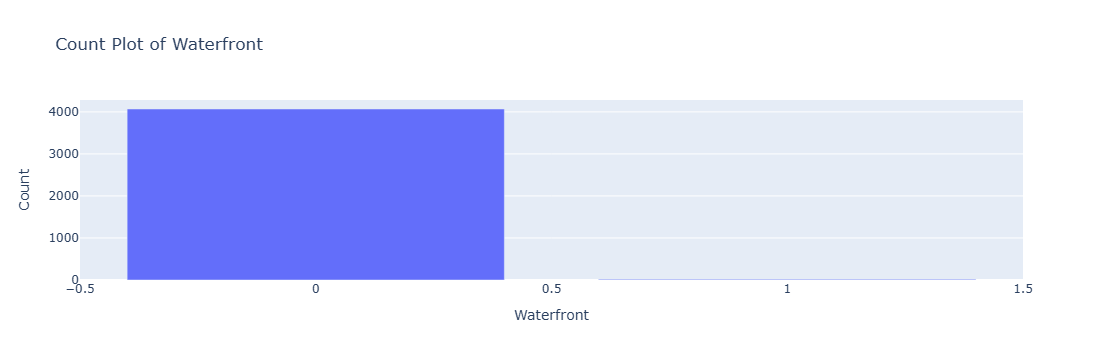

In [156]:
# Calculate counts for each category in 'waterfront'
waterfront_counts = data_sqft['waterfront'].value_counts().reset_index()
waterfront_counts.columns = ['waterfront', 'count']

# Create the bar plot
fig = px.bar(waterfront_counts, x='waterfront', y='count', 
             title='Count Plot of Waterfront')
fig.update_layout(
    xaxis_title='Waterfront',
    yaxis_title='Count'
)
fig.show()

# Feature Engineering

In [157]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [158]:
array = data_no_outliers1.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,1:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[1:5,:])

[[0.33 0.23 0.19 0.23]
 [0.33 0.27 0.2  0.15]
 [0.67 0.32 0.19 0.2 ]
 [0.   0.05 0.05 0.12]]


# Standardization

In [159]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [160]:
array = data_no_outliers1.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[1:5,:])

[[-0.63 -0.42 -0.12 -0.1   0.33 -0.92 -0.06 -0.27  0.83  0.28 -0.68 -0.17
  -0.83]
 [-0.26 -0.42  0.23 -0.01 -0.16 -0.92 -0.06 -0.27  0.83 -0.97  1.74 -0.27
  -0.83]
 [ 0.34  0.84  0.59 -0.08  0.15 -0.92 -0.06 -0.27  0.83 -0.79  1.26  0.17
   1.21]
 [ 0.06 -1.68 -1.54 -1.44 -0.36 -0.92 -0.06 -0.27 -0.67 -1.14 -0.68 -1.11
   1.21]]


# Data Spliting

In [161]:
data_no_outliers1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


In [162]:
Data = data_no_outliers1

In [163]:
X = Data.drop('price', axis=1)  # Replace 'target_column' with the name of your target column
y = Data['price']

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [165]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
244,3,1.75,2070,37904,1.0,0,0,4,1420,650,1973,0
2291,2,1.00,1030,5750,1.0,0,0,5,1030,0,1928,1970
2759,5,3.00,2795,15101,2.0,0,0,3,2795,0,1996,0
3539,4,1.75,2440,7350,1.0,0,0,3,1610,830,1978,0
4432,5,3.50,5960,13703,2.0,0,2,3,4770,1190,1984,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,3,1.75,1620,3975,1.0,0,0,5,940,680,1926,0
1452,3,2.50,2190,10370,2.0,0,0,3,2190,0,1987,2000
959,4,2.25,2260,41984,1.0,0,0,4,2260,0,1967,0
3947,5,2.25,3000,13899,2.0,0,0,4,3000,0,1975,0


In [166]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
676,3,1.00,1660,7500,1.0,0,0,4,1060,600,1940,2001
841,4,2.50,2430,5000,2.0,0,0,3,2430,0,2009,0
2261,4,4.50,3870,35889,2.0,0,0,3,2530,1340,2001,0
1120,3,2.75,2550,11160,2.0,0,0,3,2550,0,1994,0
2820,3,2.50,1940,9000,1.0,0,0,4,970,970,1948,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3187,3,2.25,1860,15559,2.0,0,0,4,1860,0,1963,0
1596,4,2.50,2910,5000,2.0,0,0,3,2910,0,2002,0
75,2,3.00,1270,1175,2.0,0,0,3,1110,160,2000,0
3956,3,1.50,1400,1022,3.0,0,0,3,1400,0,2007,0


In [167]:
y_train

244     310000.0
2291    650000.0
2759    562000.0
3539    330000.0
4432    452500.0
          ...   
1269    641000.0
1452    665000.0
959     925000.0
3947    600000.0
3567    500000.0
Name: price, Length: 3268, dtype: float64

In [168]:
y_test

676      458000.0
841      480000.0
2261     589900.0
1120     430000.0
2820     576000.0
          ...    
3187     380000.0
1596     395000.0
75       531000.0
3956     425000.0
3016    1100000.0
Name: price, Length: 817, dtype: float64

# Model selection & training

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [170]:
#Ridge Regression
Data = data_no_outliers1
# Assuming df is your DataFrame
X = Data.drop('price', axis=1)  # Replace 'target_column' with the name of your target column
y = Data['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)


In [171]:
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = sc_y.transform(y_test.values.reshape(-1, 1)).flatten()

In [172]:
# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train_scaled, y_train_scaled)

Ridge()

In [173]:
# Making predictions
y_pred_scaled = ridge_model.predict(X_test_scaled)
y_train_pred_scaled = ridge_model.predict(X_train_scaled)

# Inverse transform the predictions to original scale
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_train_pred = sc_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()

# Calculate R2 score
r2_ridge_train = r2_score(y_train, y_train_pred)
r2_ridge_test = r2_score(y_test, y_pred)
print("Ridge R2 Train Score:", r2_ridge_train)
print("Ridge R2 Test Score:", r2_ridge_test)

# Calculate Mean Squared Error
mse_ridge_train = mean_squared_error(y_train, y_train_pred)
mse_ridge_test = mean_squared_error(y_test, y_pred)
print("Ridge Mean Squared Error of Train:", mse_ridge_train)
print("Ridge Mean Squared Error of Test:", mse_ridge_test)

Ridge R2 Train Score: 0.3883229619233479
Ridge R2 Test Score: 0.38449266190823983
Ridge Mean Squared Error of Train: 28553101372.620544
Ridge Mean Squared Error of Test: 27686787124.703384


In [174]:
#Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [175]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Making predictions using the Linear Regression model
y_pred_lr_scaled = linear_model.predict(X_test_scaled)
y_train_pred_lr_scaled = linear_model.predict(X_train_scaled)

# Inverse transform the predictions to original scale
y_pred_lr = sc_y.inverse_transform(y_pred_lr_scaled.reshape(-1, 1)).flatten()
y_train_pred_lr = sc_y.inverse_transform(y_train_pred_lr_scaled.reshape(-1, 1)).flatten()

# Calculate R2 score for Linear Regression
r2_lr_train = r2_score(y_train, y_train_pred_lr)
r2_lr_test = r2_score(y_test, y_pred_lr)
print("Linear Regression R2 Train Score:", r2_lr_train)
print("Linear Regression R2 Test Score:", r2_lr_test)

# Calculate Mean Squared Error for Linear Regression
mse_lr_train = mean_squared_error(y_train, y_train_pred_lr)
mse_lr_test = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error of Train:", mse_lr_train)
print("Linear Regression Mean Squared Error of Test:", mse_lr_test)


Linear Regression R2 Train Score: 0.38832300600125136
Linear Regression R2 Test Score: 0.38448666426661504
Linear Regression Mean Squared Error of Train: 28553099315.062767
Linear Regression Mean Squared Error of Test: 27687056910.970154


In [176]:
# Initialize the Decision tree regressor model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Create a Decision Tree Regressor
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train_scaled, y_train_scaled)

DecisionTreeRegressor(random_state=42)

In [177]:
# Making predictions
y_pred_tree_scaled = dec_tree.predict(X_test_scaled)
y_train_pred_tree_scaled = dec_tree.predict(X_train_scaled)

# Inverse transform the predictions to original scale
# Assuming sc_y is your StandardScaler instance for the target variable
y_pred_tree = sc_y.inverse_transform(y_pred_tree_scaled.reshape(-1, 1)).flatten()
y_train_pred_tree = sc_y.inverse_transform(y_train_pred_tree_scaled.reshape(-1, 1)).flatten()

# Calculate R2 score for Decision Tree
r2_tree_train = r2_score(y_train, y_train_pred_tree)
r2_tree_test = r2_score(y_test, y_pred_tree)
print("Decision Tree R2 Train Score:", r2_tree_train)
print("Decision Tree R2 Test Score:", r2_tree_test)

# Calculate Mean Squared Error for Decision Tree
mse_tree_train = mean_squared_error(y_train, y_train_pred_tree)
mse_tree_test = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error of Train:", mse_tree_train)
print("Decision Tree Mean Squared Error of Test:", mse_tree_test)

Decision Tree R2 Train Score: 0.9999875057630228
Decision Tree R2 Test Score: -0.18794044386669095
Decision Tree Mean Squared Error of Train: 583231.3341493268
Decision Tree Mean Squared Error of Test: 53436006609.00556


In [178]:
# Initialize the Random forestRegressor model
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
regressor_rf = RandomForestRegressor(n_estimators=100, random_state=42)
regressor_rf.fit(X_train_scaled, y_train_scaled)

RandomForestRegressor(random_state=42)

In [179]:
# Making predictions
y_pred_tree_scaled = regressor_rf.predict(X_test_scaled)
y_train_pred_tree_scaled = regressor_rf.predict(X_train_scaled)

# Inverse transform the predictions to original scale
# Assuming sc_y is your StandardScaler instance for the target variable
y_pred_tree = sc_y.inverse_transform(y_pred_tree_scaled.reshape(-1, 1)).flatten()
y_train_pred_tree = sc_y.inverse_transform(y_train_pred_tree_scaled.reshape(-1, 1)).flatten()

# Calculate R2 score for Decision Tree
r2_tree_train = r2_score(y_train, y_train_pred_tree)
r2_tree_test = r2_score(y_test, y_pred_tree)
print("regressor_rf  R2 Train Score:", r2_tree_train)
print("regressor_rf  R2 Test Score:", r2_tree_test)

# Calculate Mean Squared Error for Decision Tree
mse_tree_train = mean_squared_error(y_train, y_train_pred_tree)
mse_tree_test = mean_squared_error(y_test, y_pred_tree)
print("regressor_rf  Mean Squared Error of Train:", mse_tree_train)
print("regressor_rf  Mean Squared Error of Test:", mse_tree_test)

regressor_rf  R2 Train Score: 0.9196902350416638
regressor_rf  R2 Test Score: 0.40765065175929016
regressor_rf  Mean Squared Error of Train: 3748862091.1405582
regressor_rf  Mean Squared Error of Test: 26645093069.1461


# Model Evaluation

In [180]:
Data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


In [181]:
# Assuming 'data' is your original DataFrame, 'sc_X' is your fitted StandardScaler instance for features,
# and 'ridge_model' is your trained Ridge model

#Input data
new_data_dict = {
    'bedrooms': [4.0],
    'bathrooms': [2.50],
    'sqft_living': [1940],
    'sqft_lot': [10500],
    'floors': [1.0],
    'waterfront': [0],
    'view': [0],
    'condition': [4],
    'sqft_above': [1140],
    'sqft_basement': [800],
    'yr_built': [1976],
    'yr_renovated': [1992]
}

# Convert new data to DataFrame with the same column names as the training data
new_data_df = pd.DataFrame(new_data_dict)

# Feature scaling (applied to the new data)
new_data_scaled = sc_X.transform(new_data_df)
models = [linear_model, ridge_model, dec_tree, regressor_rf]
for i in models:
    # Making predictions with the scaled new data
    predicted_output_scaled = i.predict(new_data_scaled)
    predicted_output = sc_y.inverse_transform(predicted_output_scaled.reshape(-1, 1)).flatten()
    print("Predicted Output:", predicted_output[0])

Predicted Output: 417856.5587109732
Predicted Output: 417913.04994029796
Predicted Output: 550000.0
Predicted Output: 459200.0


## Save the model

In [182]:
import pickle

# Save the trained model with pickle
pickle.dump(model, open(r"C:\Users\sayal\Downloads\finalized_model.sav", "wb"))

print("✅ Model retrained and saved successfully with scikit-learn 1.5.0")


✅ Model retrained and saved successfully with scikit-learn 1.5.0


# Model Deployment

In [85]:
import tkinter as tk
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Load the dataset
data = pd.read_csv('House.csv')

# Extract features and target variable
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
          'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 
          'yr_built', 'yr_renovated']]
y = data['price']

# Train the regression model
model = DecisionTreeRegressor()  # Instantiate DecisionTreeRegressor
model.fit(X, y)  # Call fit() on the instantiated model

def predict_price():
    try:
        # Get user input
        bedrooms = int(entries[0].get())
        bathrooms = float(entries[1].get())
        sqft_living = int(entries[2].get())
        sqft_lot = int(entries[3].get())
        floors = float(entries[4].get())
        waterfront = int(entries[5].get())
        view = int(entries[6].get())
        condition = int(entries[7].get())
        sqft_above = int(entries[8].get())
        sqft_basement = int(entries[9].get())
        yr_built = int(entries[10].get())
        yr_renovated =int(entries[11].get())
        
        # Perform prediction
        predicted_price = model.predict([[bedrooms, bathrooms, sqft_living, sqft_lot, floors, 
                                           waterfront, view, condition, sqft_above, sqft_basement, 
                                           yr_built, yr_renovated]])[0]
        result_label.config(text=f"The predicted price is Rs.{predicted_price:,.2f}")
    except ValueError:
        result_label.config(text="Please enter valid inputs.")

# Create GUI window
window = tk.Tk()
window.title("House Price Prediction")

# Create labels and entry fields for user input
labels = ['Bedrooms:', 'Bathrooms:', 'Sqft Living:', 'Sqft Lot:', 'Floors:', 
          'Waterfront:', 'View:', 'Condition:', 'Sqft Above:', 'Sqft Basement:', 
          'Year Built:', 'Year Renovated:']

entries = []
for i, label_text in enumerate(labels):
    tk.Label(window, text=label_text).grid(row=i, column=0)
    entry = tk.Entry(window)
    entry.grid(row=i, column=1)
    entries.append(entry)

# Create a button to trigger prediction
predict_button = tk.Button(window, text="Predict Price", command=predict_price)
predict_button.grid(row=len(labels), columnspan=2)


# Create label to display prediction result
result_label = tk.Label(window, text="")
result_label.grid(row=len(labels)+1, columnspan=2)

window.mainloop()


In [86]:
import sklearn
print(sklearn.__version__)


1.5.0
